[] planet radius vs period.

<font color = purple>
    
# Coleta de Dados

In [54]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pio.renderers.default = 'iframe'
sns.set_theme(context = 'notebook', palette = 'flare_r')
warnings.filterwarnings('ignore')

In [55]:
dados = pd.read_csv('../Projetos/exoplanets.csv', low_memory = False)
print(f'Este data frame contêm {dados.shape[0]} linhas e {dados.shape[1]} colunas. \n')
dados.head(3)

Este data frame contêm 5747 linhas e 314 colunas. 



,A,AUPPER,ALOWER,UA,AREF,AURL,AR,ARUPPER,ARLOWER,UAR,...,VREF,VURL,VSINI,VSINIUPPER,VSINILOWER,UVSINI,VSINIREF,VSINIURL,KEPID,KDE
0,0.078010,0.001300,0.001300,0.001300,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,11.9153,0.443805,0.443805,0.443805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.034472,0.000676,0.000676,0.000676,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,15.1619,0.974724,0.974724,0.974724,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
2,0.137610,0.002897,0.002897,0.002897,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,31.8896,3.494090,3.494090,3.494090,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1


<font color = purple size = 4>

# Amostra Geral

In [56]:
df_g = dados[['NAME', 'ECC', 'ECCUPPER', 'ECCLOWER', 'A', 'ALOWER', 'AUPPER',\
              'MSTAR', 'MSTARUPPER', 'MSTARLOWER', 'PER', 'PERUPPER', 'PERLOWER', 'PLANETDISCMETH']]

In [57]:
df_g.describe().round(3)

,ECC,ECCUPPER,ECCLOWER,A,ALOWER,AUPPER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER
count,4784.000,821.000,821.000,5627.000,3168.000,3168.000,4929.000,4839.000,4839.000,5733.000,5531.000,5531.000
mean,0.031,0.081,0.043,0.384,0.013,0.013,1.003,0.095,0.098,254.595,3.232,3.778
std,0.104,0.096,0.045,2.069,0.078,0.079,0.308,0.089,0.132,5194.153,57.618,88.087
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.180,0.000,-0.000
25%,0.000,0.020,0.008,0.056,0.001,0.001,0.850,0.043,0.044,5.118,0.000,0.000
50%,0.000,0.050,0.030,0.108,0.002,0.002,0.980,0.070,0.065,13.840,0.000,0.000
75%,0.000,0.100,0.065,0.284,0.005,0.005,1.110,0.120,0.110,57.389,0.001,0.001
max,0.970,0.900,0.290,113.443,2.920,2.920,3.601,2.450,2.090,318498.000,3414.000,5329.000


<font color = purple size =4>
<p>

## KOI (Kepler Objects of Interest):

Os dados do tipo [KOI](https://exoplanetarchive.ipac.caltech.edu/docs/Kepler_KOI_docs.html) são eventos periódicos, que parecem planetas transitando a estrela, mas ainda não foi confirmado. Por isso, vou separá-los em outro data frame



In [58]:
df_koi = df_g.query("NAME.str.contains('KOI')")
df_koi.head()

,NAME,ECC,ECCUPPER,ECCLOWER,A,ALOWER,AUPPER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,PLANETDISCMETH
1051,KOI-4427 b,0.0,NaN,NaN,0.441345,0.014264,0.014264,0.526,0.040,0.062,147.660600,1.100000e-03,1.400000e-03,Transit
1890,KOI-13 b,0.0,0.05,0.0,0.034228,0.000663,0.000663,1.720,0.100,0.100,1.763588,3.700000e-07,3.700000e-07,Transit
3263,KOI 753.01,0.0,NaN,NaN,0.141900,NaN,NaN,0.961,0.110,0.121,19.899140,1.494000e-05,1.494000e-05,NaN
3264,KOI 760.01,0.0,NaN,NaN,0.056500,NaN,NaN,0.976,0.073,0.055,4.959319,5.150000e-07,5.150000e-07,NaN
3265,KOI 115.01,0.0,NaN,NaN,0.059100,NaN,NaN,0.941,0.074,0.054,5.412204,3.052000e-06,3.052000e-06,NaN


In [59]:
df_koi.shape

(2486, 14)

In [60]:
df_g = df_g.query("not NAME.str.contains('KOI')")
df_g.describe().round(3)

,ECC,ECCUPPER,ECCLOWER,A,ALOWER,AUPPER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER
count,2404.000,820.000,820.000,3247.000,3166.000,3166.000,2549.000,2465.000,2465.000,3247.000,3166.000,3166.000
mean,0.062,0.081,0.043,0.434,0.013,0.013,1.000,0.071,0.068,341.854,5.644,6.598
std,0.140,0.096,0.045,2.588,0.078,0.079,0.304,0.092,0.095,6512.139,76.072,116.356
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.180,0.000,0.000
25%,0.000,0.020,0.008,0.053,0.001,0.001,0.850,0.036,0.040,4.572,0.000,0.000
50%,0.000,0.050,0.030,0.101,0.002,0.002,0.990,0.050,0.050,12.163,0.000,0.000
75%,0.042,0.100,0.065,0.232,0.005,0.005,1.130,0.080,0.070,41.778,0.001,0.001
max,0.970,0.900,0.290,113.443,2.920,2.920,3.090,2.450,2.090,318498.000,3414.000,5329.000


In [61]:
df_g.head()  # Amostra final

,NAME,ECC,ECCUPPER,ECCLOWER,A,ALOWER,AUPPER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,PLANETDISCMETH
0,Kepler-107 d,NaN,NaN,NaN,0.078010,0.001300,0.001300,NaN,NaN,NaN,7.958203,0.000104,0.000104,Transit
1,Kepler-1049 b,0.0,NaN,NaN,0.034472,0.000676,0.000676,0.51,0.03,0.03,3.273461,0.000005,0.000005,Transit
2,Kepler-813 b,0.0,NaN,NaN,0.137610,0.002897,0.002897,0.95,0.05,0.07,19.129473,0.000075,0.000075,Transit
3,Kepler-427 b,0.0,0.57,0.0,0.091351,0.001903,0.001903,0.96,0.06,0.06,10.290994,0.000001,0.000001,Transit
4,Kepler-1056 b,0.0,NaN,NaN,0.185149,0.008817,0.008817,1.12,0.20,0.12,27.495606,0.000146,0.000146,Transit


<font color = purple size =4>
<p>

## Sistema Solar

In [62]:
df_planetas = {
    "Planeta": ["Mercúrio", "Vênus", "Terra", "Marte", "Júpiter", "Saturno", "Urano", "Netuno"],
    "Período (ano)": [88.0/365.25, 224.7/365.25, 365.2/365.25, 687.0/365.25, 4331/365.25, 10747/365.25,
                               30589/365.25, 59800/365.25],
    "Semieixo maior (UA)": [57.9/149.6, 108.2/149.6, 149.6/149.6, 228.0/149.6, 778.5/149.6, 1432.0/149.6,
                                   2867.0/149.6, 4515.0/149.6],
    "Excentricidade": [0.206, 0.007, 0.017, 0.094, 0.049, 0.052, 0.047, 0.010]
}

# Criando o DataFrame
planetas = pd.DataFrame(df_planetas)

planetas['PER^2'] = planetas['Período (ano)']**2
planetas['A^3'] = planetas['Semieixo maior (UA)']**3
planetas

,Planeta,Período (ano),Semieixo maior (UA),Excentricidade,PER^2,A^3
0,Mercúrio,0.240931,0.387032,0.206,0.058048,0.057975
1,Vênus,0.615195,0.723262,0.007,0.378465,0.378344
2,Terra,0.999863,1.000000,0.017,0.999726,1.000000
3,Marte,1.880903,1.524064,0.094,3.537798,3.540053
4,Júpiter,11.857632,5.203877,0.049,140.603431,140.922737
5,Saturno,29.423682,9.572193,0.052,865.753087,877.070034
6,Urano,83.748118,19.164439,0.047,7013.747223,7038.632626
7,Netuno,163.723477,30.180481,0.010,26805.376944,27490.236959


In [63]:
planetas['MSUN'] = 1
planetas['VELO'] = np.sqrt(planetas['MSUN']/planetas['Semieixo maior (UA)'])*29.88
planetas

,Planeta,Período (ano),Semieixo maior (UA),Excentricidade,PER^2,A^3,MSUN,VELO
0,Mercúrio,0.240931,0.387032,0.206,0.058048,0.057975,1,48.029394
1,Vênus,0.615195,0.723262,0.007,0.378465,0.378344,1,35.134418
2,Terra,0.999863,1.000000,0.017,0.999726,1.000000,1,29.880000
3,Marte,1.880903,1.524064,0.094,3.537798,3.540053,1,24.203544
4,Júpiter,11.857632,5.203877,0.049,140.603431,140.922737,1,13.098365
5,Saturno,29.423682,9.572193,0.052,865.753087,877.070034,1,9.657726
6,Urano,83.748118,19.164439,0.047,7013.747223,7038.632626,1,6.825470
7,Netuno,163.723477,30.180481,0.010,26805.376944,27490.236959,1,5.438981


<font color = purple size = 4>

# Projeto 1ª Lei de Kepler (Excentricidades)

In [64]:
df_ecc = df_g[['NAME', 'ECC', 'ECCUPPER', 'ECCLOWER', 'A', 'ALOWER', 'AUPPER']]

In [65]:
df_ecc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 0 to 3262
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      3261 non-null   object 
 1   ECC       2404 non-null   float64
 2   ECCUPPER  820 non-null    float64
 3   ECCLOWER  820 non-null    float64
 4   A         3247 non-null   float64
 5   ALOWER    3166 non-null   float64
 6   AUPPER    3166 non-null   float64
dtypes: float64(6), object(1)
memory usage: 203.8+ KB


In [66]:
df_ecc.isna().sum()

NAME           0
ECC          857
ECCUPPER    2441
ECCLOWER    2441
A             14
ALOWER        95
AUPPER        95
dtype: int64

In [67]:
df_ecc = df_ecc.dropna().reset_index(drop = True)
df_ecc.isna().sum()

NAME        0
ECC         0
ECCUPPER    0
ECCLOWER    0
A           0
ALOWER      0
AUPPER      0
dtype: int64

In [68]:
df_ecc_0 = df_ecc[df_ecc['ECC'] == 0]

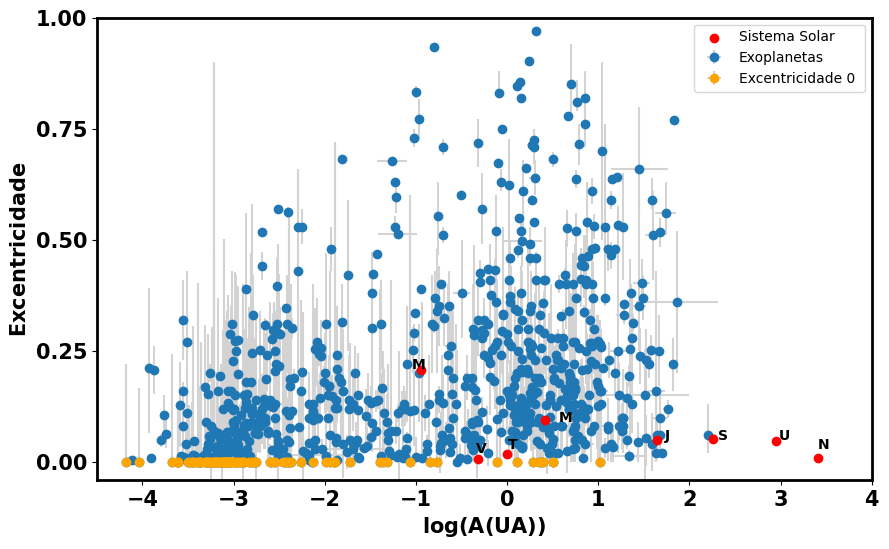

In [69]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (10, 6))

'''Plotando os dados com margem de erro'''
ax.errorbar(x = np.log(df_ecc['A']), y = df_ecc['ECC'], 
            xerr = [df_ecc['ALOWER']/df_ecc['A'], df_ecc['AUPPER']/df_ecc['A']],
            yerr = [df_ecc['ECCLOWER'], df_ecc['ECCUPPER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            alpha = 1, label = 'Exoplanetas')

ax.errorbar(x = np.log(df_ecc_0['A']), y = df_ecc_0['ECC'], 
            xerr = [df_ecc_0['ALOWER']/df_ecc_0['A'], df_ecc_0['AUPPER']/df_ecc_0['A']],
            yerr = [df_ecc_0['ECCLOWER'], df_ecc_0['ECCUPPER']], fmt = 'o', color='orange', ecolor='#d3d3d3',
            alpha = 1, label = 'Excentricidade 0 ')

'''Editando o gráfico'''
ax.set_xlabel(r'$\mathbf{log(A (UA))}$', fontsize = 15)
ax.set_ylabel(r'$\mathbf{Excentricidade}$', fontsize = 15)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xlim(-4.5, 4)
ax.set_ylim(-0.04, 1)

def bordas(ax):
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

bordas(ax)

plt.scatter(x = np.log(planetas['Semieixo maior (UA)']), y = planetas['Excentricidade'], c = 'red', zorder = 10, label = 'Sistema Solar')

ax.annotate(xy = (np.log(0.35), 0.21), text = r'$\mathbf{M}$', zorder = 10)
ax.annotate(xy = (np.log(0.7), 0.02), text = r'$\mathbf{V}$', zorder = 10)
ax.annotate(xy = (np.log(1), 0.03), text = r'$\mathbf{T}$', zorder = 10)
ax.annotate(xy = (np.log(1.75), 0.09), text = r'$\mathbf{M}$', zorder = 10)
ax.annotate(xy = (np.log(5.6), .05), text = r'$\mathbf{J}$', zorder = 10)
ax.annotate(xy = (np.log(10), .05), text = r'$\mathbf{S}$', zorder = 10)
ax.annotate(xy = (np.log(19.5), .05), text = r'$\mathbf{U}$', zorder = 10)
ax.annotate(xy = (np.log(30), .03), text = r'$\mathbf{N}$', zorder = 10)

ax.legend()
fig.show()

In [70]:
sum(df_ecc.ECC == 0)/df_ecc['ECC'].shape[0]

0.13316892725030827

In [71]:
df_ecc['ECC'].shape[0]

811

<font color = purple size = 4>

# Projeto 2ª Lei de Kepler

In [72]:
df = df_g[['NAME', 'A', 'AUPPER', 'ALOWER', 'MSTAR', 'MSTARLOWER', 'MSTARUPPER']]
df_velo_limpo = df.replace(0, np.nan).dropna().reset_index(drop = True)
df_velo_limpo.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER
0,Kepler-1049 b,0.034472,0.000676,0.000676,0.51,0.03,0.03
1,Kepler-813 b,0.137610,0.002897,0.002897,0.95,0.07,0.05
2,Kepler-427 b,0.091351,0.001903,0.001903,0.96,0.06,0.06
3,Kepler-1056 b,0.185149,0.008817,0.008817,1.12,0.12,0.20
4,Kepler-1165 b,0.091298,0.002693,0.002693,1.13,0.08,0.12


In [73]:
df_velo_limpo['VELO'] = df_velo_limpo['MSTAR']/df_velo_limpo['A']
df_velo_limpo['VELO'] = df_velo_limpo['VELO']**.5
df_velo_limpo.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO
0,Kepler-1049 b,0.034472,0.000676,0.000676,0.51,0.03,0.03,3.846371
1,Kepler-813 b,0.137610,0.002897,0.002897,0.95,0.07,0.05,2.627464
2,Kepler-427 b,0.091351,0.001903,0.001903,0.96,0.06,0.06,3.241746
3,Kepler-1056 b,0.185149,0.008817,0.008817,1.12,0.12,0.20,2.459508
4,Kepler-1165 b,0.091298,0.002693,0.002693,1.13,0.08,0.12,3.518109


In [74]:
df_velo_limpo['Q'] = df_velo_limpo['MSTAR']/df_velo_limpo['A']
df_velo_limpo['QUPPER'] = df_velo_limpo['Q']*np.sqrt((df_velo_limpo['MSTARUPPER']/df_velo_limpo['MSTAR'])**2 +\
                                               (df_velo_limpo['AUPPER']/df_velo_limpo['A'])**2)
df_velo_limpo['QLOWER'] = df_velo_limpo['Q']*np.sqrt((df_velo_limpo['MSTARLOWER']/df_velo_limpo['MSTAR'])**2 +\
                                               (df_velo_limpo['ALOWER']/df_velo_limpo['A'])**2)
df_velo_limpo['VELO'] = np.sqrt(df_velo_limpo['Q'])
df_velo_limpo['VELOUPPER'] = np.sqrt(df_velo_limpo['QUPPER'])/2*np.sqrt(df_velo_limpo['Q'])
df_velo_limpo['VELOLOWER'] = np.sqrt(df_velo_limpo['QLOWER'])/2*np.sqrt(df_velo_limpo['Q'])
df_velo_limpo.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,Q,QUPPER,QLOWER,VELOUPPER,VELOLOWER
0,Kepler-1049 b,0.034472,0.000676,0.000676,0.51,0.03,0.03,3.846371,14.794573,0.917344,0.917344,1.841990,1.841990
1,Kepler-813 b,0.137610,0.002897,0.002897,0.95,0.07,0.05,2.627464,6.903568,0.391335,0.529039,0.821829,0.955544
2,Kepler-427 b,0.091351,0.001903,0.001903,0.96,0.06,0.06,3.241746,10.508916,0.692336,0.692336,1.348675,1.348675
3,Kepler-1056 b,0.185149,0.008817,0.008817,1.12,0.12,0.20,2.459508,6.049182,1.117959,0.709256,1.300263,1.035667
4,Kepler-1165 b,0.091298,0.002693,0.002693,1.13,0.08,0.12,3.518109,12.377092,1.364148,0.949276,2.054519,1.713860


In [75]:
df_velo_limpo['VELO'] = df_velo_limpo['VELO']*29.88
df_velo_limpo['VELOUPPER'] = df_velo_limpo['VELOUPPER']*29.88
df_velo_limpo['VELOLOWER'] = df_velo_limpo['VELOLOWER']*29.88
df_velo_limpo.drop(columns = ['Q', 'QUPPER', 'QLOWER'], inplace = True)

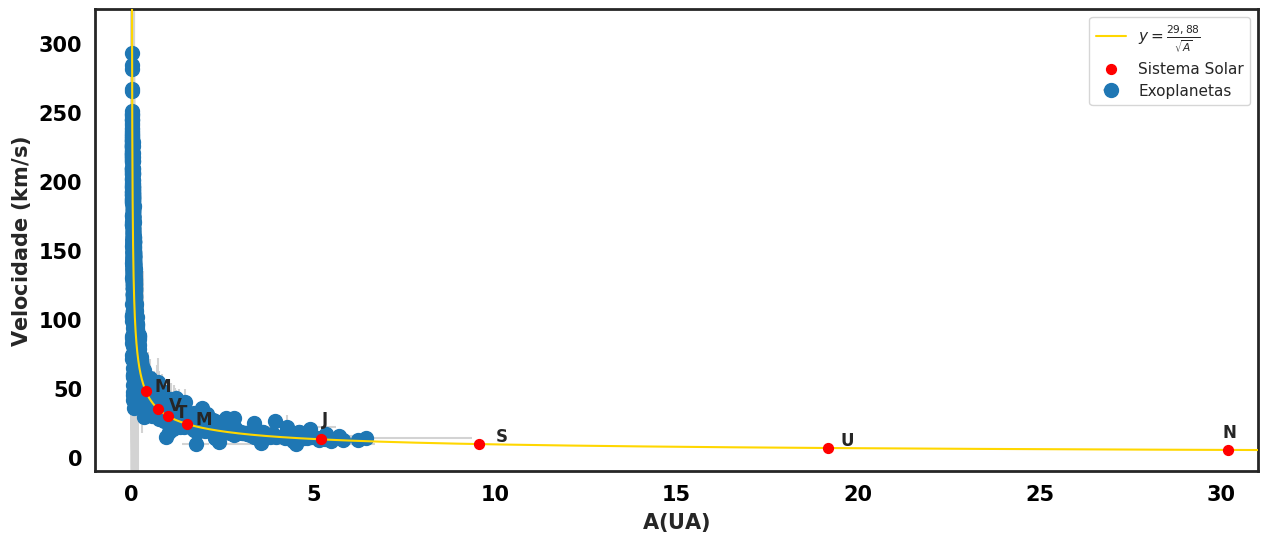

In [76]:
sns.set_theme(style = 'white')
fig, ax = plt.subplots(figsize = (15, 6))

ax.errorbar(x = df_velo_limpo['A'], y = df_velo_limpo['VELO'], 
            xerr = [df_velo_limpo['ALOWER'], df_velo_limpo['AUPPER']],
            yerr = [df_velo_limpo['VELOUPPER'], df_velo_limpo['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            alpha = 1, label = 'Exoplanetas', markersize = 10)

ax.set_xlabel(r'$\mathbf{A (UA)}$', fontsize = 15)
ax.set_ylabel(r'$\mathbf{Velocidade\ (km/s)}$', fontsize = 15)
ax.set_ylim(-10, 324.5)
ax.set_xlim(-1, 31)

ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

x = []
z = []
for i in np.arange(0.001, 100, 0.0001):
    x.append(i)
    z.append((1/i**.5)*29.88)
ax.plot(x, z, alpha = 1, label = r'$y = \frac{29,88}{\sqrt{A}}$', c = 'gold', zorder = 10)      # gera o plot

ax.annotate(xy = (0.6, 1.6*29.88), text = r'$\mathbf{M}$')
ax.annotate(xy = (1, 1.15*29.88), text = r'$\mathbf{V}$')
ax.annotate(xy = (1.2, .97*29.88), text = r'$\mathbf{T}$')
ax.annotate(xy = (1.75, 0.8*29.88), text = r'$\mathbf{M}$')  
ax.annotate(xy = (5.2, .8*29.88), text = r'$\mathbf{J}$')
ax.annotate(xy = (10, .4*29.88), text = r'$\mathbf{S}$')
ax.annotate(xy = (19.5, .3*29.88), text = r'$\mathbf{U}$')
ax.annotate(xy = (30, .5*29.88), text = r'$\mathbf{N}$')

ax.scatter(x = planetas['Semieixo maior (UA)'], y = planetas['VELO'], color = 'red', zorder = 10, label = 'Sistema Solar', s = 50)

plt.legend()
plt.show()

<font color = purple size = 4>

## Separação por massas

In [77]:
df_massas = df_velo_limpo.sort_values(by = 'MSTAR').reset_index(drop = True)
df_massas.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,VELOUPPER,VELOLOWER
0,TRAPPIST-1 h,0.061709,0.001387,0.001387,0.089,0.006,0.006,35.884070,5.743979,5.743979
1,TRAPPIST-1 b,0.011505,0.000259,0.000259,0.089,0.006,0.006,83.105621,30.808472,30.808472
2,TRAPPIST-1 d,0.022201,0.000499,0.000499,0.089,0.006,0.006,59.826047,15.965774,15.965774
3,TRAPPIST-1 g,0.046697,0.001049,0.001049,0.089,0.006,0.006,41.250812,7.590569,7.590569
4,TRAPPIST-1 f,0.038380,0.000862,0.000862,0.089,0.006,0.006,45.501287,9.235423,9.235423


In [78]:
df_massas.shape

(2329, 10)

<Axes: xlabel='MSTAR', ylabel='Count'>

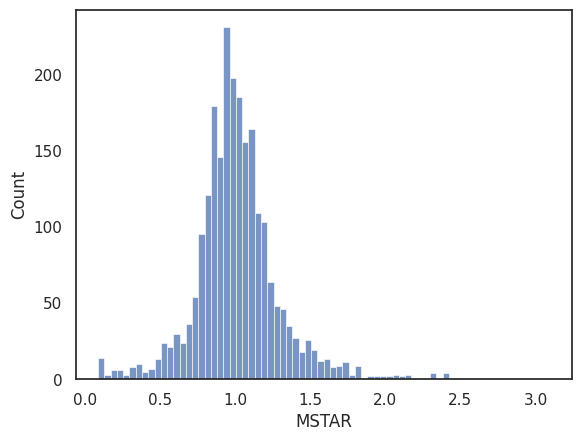

In [79]:
sns.set_theme(style = 'white')
sns.histplot(df_massas['MSTAR'])

In [80]:
classe_a = df_massas.iloc[:390]
classe_b = df_massas.iloc[391:805]
classe_c = df_massas.iloc[805:1170]
classe_d = df_massas.iloc[1170:1572]
classe_e = df_massas.iloc[1572:1927]
classe_f = df_massas.iloc[1927:]

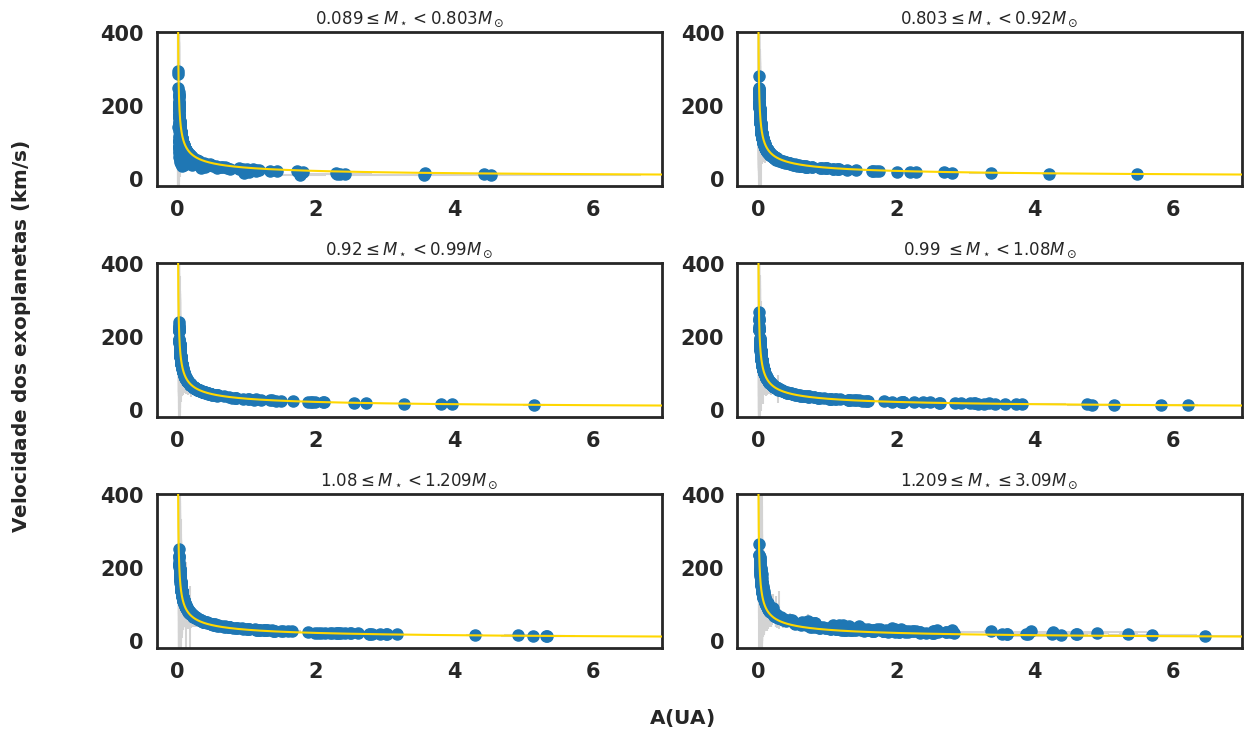

In [81]:
sns.set_theme(style = 'white')
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.15)

def grafico(axx, axy):
    x = []
    y = []
    for i in np.arange(0.002, 12, 0.0001):
        x.append(i)
        y.append((1/i**.5)*29.88)
    ax[axx, axy].plot(x, y, c = 'gold', zorder = 10)      # gera o plot
    ax[axx, axy].set_ylim(-20, 400)
    ax[axx, axy].set_xlim(-.3, 7)
    ax[axx, axy].set_xticks([0, 2, 4, 6])
    bordas(ax[axx, axy])
    

ax[0, 0].errorbar(x = classe_a['A'], y = classe_a['VELO'], 
            xerr = [classe_a['ALOWER'], classe_a['AUPPER']],
            yerr = [classe_a['VELOUPPER'], classe_a['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            markersize = 8)
grafico(0, 0)
ax[0, 0].set_title(r'$0.089 \leq M_\star < 0.803 M_\odot$')

ax[0,1].errorbar(x = classe_b['A'], y = classe_b['VELO'], 
            xerr = [classe_b['ALOWER'], classe_b['AUPPER']],
            yerr = [classe_b['VELOUPPER'], classe_b['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            markersize = 8)
grafico(0, 1)
ax[0, 1].set_title(r'$0.803 \leq M_\star < 0.92 M_\odot$')

ax[1,0].errorbar(x = classe_c['A'], y = classe_c['VELO'], 
            xerr = [classe_c['ALOWER'], classe_c['AUPPER']],
            yerr = [classe_c['VELOUPPER'], classe_c['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            markersize = 8)
grafico(1, 0)
ax[1, 0].set_title(r'$0.92 \leq M_\star < 0.99 M_\odot$')

ax[1,1].errorbar(x = classe_d['A'], y = classe_d['VELO'], 
            xerr = [classe_d['ALOWER'], classe_d['AUPPER']],
            yerr = [classe_d['VELOUPPER'], classe_d['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            markersize = 8)
grafico(1, 1)
ax[1, 1].set_title(r'0.99 $\leq M_\star < 1.08 M_\odot$')

ax[2,0].errorbar(x = classe_e['A'], y = classe_e['VELO'], 
            xerr = [classe_e['ALOWER'], classe_e['AUPPER']],
            yerr = [classe_e['VELOUPPER'], classe_e['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            markersize = 8)
grafico(2, 0)
ax[2, 0].set_title(r'$1.08 \leq M_\star < 1.209 M_\odot$')

ax[2,1].errorbar(x = classe_f['A'], y = classe_f['VELO'], 
            xerr = [classe_f['ALOWER'], classe_f['AUPPER']],
            yerr = [classe_f['VELOUPPER'], classe_f['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            markersize = 8)
grafico(2, 1)
ax[2, 1].set_title(r'$1.209 \leq M_\star \leq 3.09 M_\odot$')

fig.supylabel(r'$\mathbf{Velocidade\ dos\ exoplanetas\ (km/s)}$')
fig.supxlabel(r'$\mathbf{A (UA)}$')
plt.show()

In [82]:
df_m_solar = df_massas[(df_massas['MSTAR']<=1.1) & (df_massas['MSTAR']>=0.9)]

<font color = purple size = 4>

## Número de exoplanetas descobertos

In [83]:
df_descobertas = dados[['NAME', 'DATE']]
df_desc_sem_koi = df_descobertas.query('not NAME.str.contains("KOI")')
df_desc_limpo = df_desc_sem_koi.replace(0, np.nan).dropna().reset_index(drop = True)
df_desc_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    3261 non-null   object 
 1   DATE    3261 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


In [84]:
frequencia = df_desc_limpo.groupby('DATE').count()

In [85]:
frequencia_acumulada = frequencia.cumsum()
frequencia_acumulada.head()

,NAME
DATE,
1988.0,1
1989.0,2
1992.0,4
1993.0,5
1994.0,6


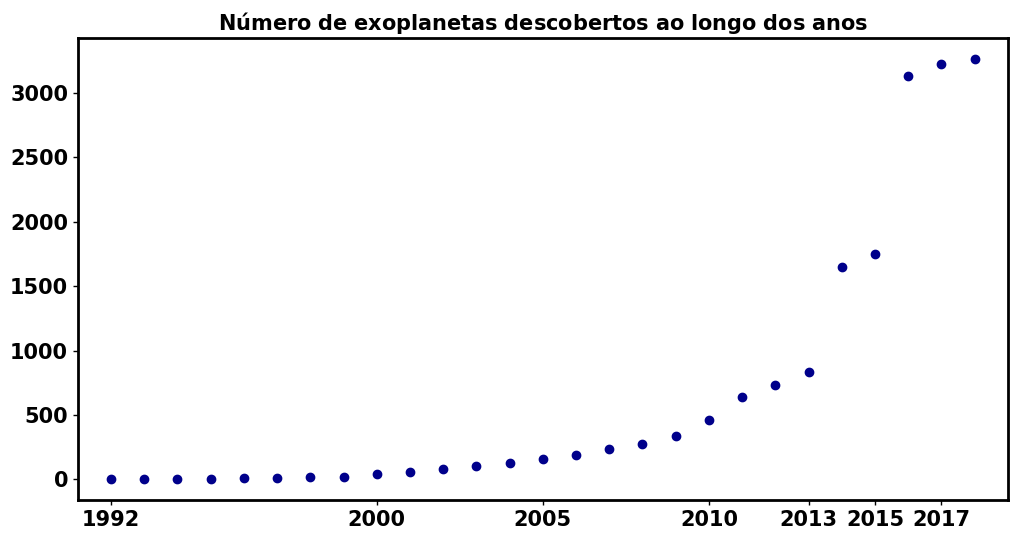

In [86]:
'''Definindo a figura'''

plt.style.use('default')

fig, ax = plt.subplots(figsize = (12, 6))


'''Plotando o gráfico'''

ax.scatter(x = frequencia_acumulada.index, y = frequencia_acumulada.values, color='darkblue')

ax.set_title(r'$\mathbf{Número\ de\ exoplanetas\ descobertos\ ao\ longo\ dos\ anos}$', fontsize= 15)
ax.set_xlabel('', fontsize = 15)
# ax.set_ylabel(r'\mathbf{Número de exoplanetas}$', fontsize = 15)

ax.set_xticks([1992, 2000, 2005, 2010, 2013, 2015, 2017 ])
ax.set_xlim(1991, 2019)
ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

fig.show()

<font color = purple size = 4>

# Projeto 3ª Lei de Kepler - Exoplanetas

In [87]:
df_ter = df_g[['NAME', 'A', 'AUPPER', 'ALOWER', 'PER', 'PERUPPER', 'PERLOWER']]
df_ter.isna().sum()

NAME         0
A           14
AUPPER      95
ALOWER      95
PER         14
PERUPPER    95
PERLOWER    95
dtype: int64

In [88]:
df_ter.describe().round(3)

,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER
count,3247.000,3166.000,3166.000,3247.000,3166.000,3166.000
mean,0.434,0.013,0.013,341.854,5.644,6.598
std,2.588,0.079,0.078,6512.139,76.072,116.356
min,0.000,0.000,0.000,0.180,0.000,0.000
25%,0.053,0.001,0.001,4.572,0.000,0.000
50%,0.101,0.002,0.002,12.163,0.000,0.000
75%,0.232,0.005,0.005,41.778,0.001,0.001
max,113.443,2.920,2.920,318498.000,3414.000,5329.000


In [89]:
df_limpo = df_ter.replace(0, np.nan).dropna().reset_index(drop = True)
df_limpo['PER'] = df_limpo['PER']/365
df_limpo['PERUPPER'] = df_limpo['PERUPPER']/365
df_limpo['PERLOWER'] = df_limpo['PERLOWER']/365
df_limpo.head()

,NAME,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER
0,Kepler-107 d,0.078010,0.001300,0.001300,0.021803,2.849315e-07,2.849315e-07
1,Kepler-1049 b,0.034472,0.000676,0.000676,0.008968,1.454795e-08,1.454795e-08
2,Kepler-813 b,0.137610,0.002897,0.002897,0.052410,2.042466e-07,2.042466e-07
3,Kepler-427 b,0.091351,0.001903,0.001903,0.028195,3.013699e-09,3.013699e-09
4,Kepler-1056 b,0.185149,0.008817,0.008817,0.075330,3.991781e-07,3.991781e-07


In [90]:
df_limpo.describe().round(4)

,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER
count,3154.0000,3154.0000,3154.0000,3154.0000,3154.0000,3154.0000
mean,0.3556,0.0129,0.0127,0.4117,0.0155,0.0181
std,0.7471,0.0788,0.0778,1.3837,0.2088,0.3194
min,0.0048,0.0001,0.0001,0.0005,0.0000,0.0000
25%,0.0528,0.0010,0.0010,0.0123,0.0000,0.0000
50%,0.1005,0.0020,0.0020,0.0330,0.0000,0.0000
75%,0.2329,0.0047,0.0047,0.1143,0.0000,0.0000
max,9.0400,2.9195,2.9195,20.4986,9.3534,14.6000


In [91]:
df_limpo['A^3'] = df_limpo['A']**3
df_limpo['deltaAUPPER^3'] = 3*df_limpo['A']**2*df_limpo['AUPPER']
df_limpo['deltaALOWER^3'] = 3*df_limpo['A']**2*df_limpo['ALOWER']

df_limpo['PER^2'] = df_limpo['PER']**2
df_limpo['deltaPERUPPER^2'] = 2*df_limpo['PER']*df_limpo['PERUPPER']
df_limpo['deltaPERLOWER^2'] = 2*df_limpo['PER']*df_limpo['PERLOWER']
df_limpo.head()

,NAME,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER,A^3,deltaAUPPER^3,deltaALOWER^3,PER^2,deltaPERUPPER^2,deltaPERLOWER^2
0,Kepler-107 d,0.078010,0.001300,0.001300,0.021803,2.849315e-07,2.849315e-07,0.000475,0.000024,0.000024,0.000475,1.242489e-08,1.242489e-08
1,Kepler-1049 b,0.034472,0.000676,0.000676,0.008968,1.454795e-08,1.454795e-08,0.000041,0.000002,0.000002,0.000080,2.609432e-10,2.609432e-10
2,Kepler-813 b,0.137610,0.002897,0.002897,0.052410,2.042466e-07,2.042466e-07,0.002606,0.000165,0.000165,0.002747,2.140893e-08,2.140893e-08
3,Kepler-427 b,0.091351,0.001903,0.001903,0.028195,3.013699e-09,3.013699e-09,0.000762,0.000048,0.000048,0.000795,1.699395e-10,1.699395e-10
4,Kepler-1056 b,0.185149,0.008817,0.008817,0.075330,3.991781e-07,3.991781e-07,0.006347,0.000907,0.000907,0.005675,6.014051e-08,6.014051e-08


R² = 0.9934, [ 0.97866467 -0.09446873]


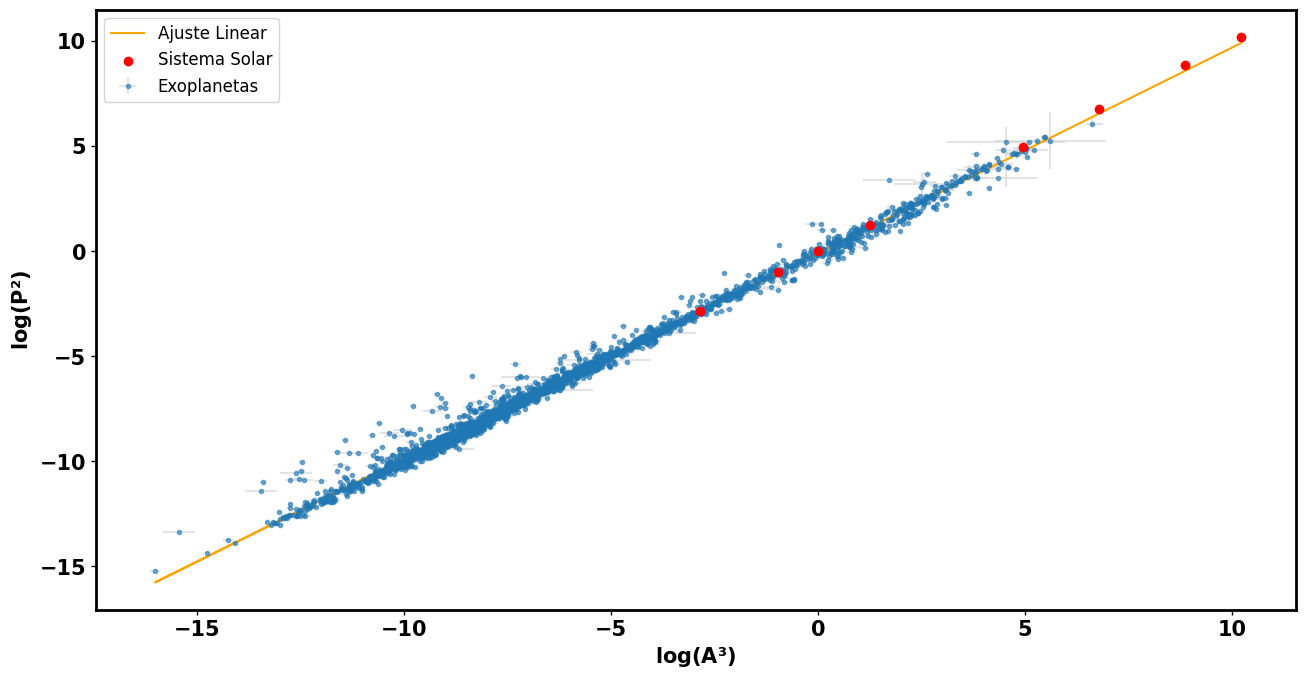

In [92]:
'''definindo o estilo da imagem e criando a figura'''
plt.style.use('default')  
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])   # Adicionando os eixoss

'''Realizando o ajusto dos pontos'''
inclinacao, intercept = np.polyfit(np.log(pd.concat([df_limpo['A^3'],planetas['A^3']])), 
                                   np.log(pd.concat([df_limpo['PER^2'], planetas['PER^2']])), 1)

'''Plotando o gráfico com as margens de erro e a reta ajustada'''
ax.errorbar(x = np.log(df_limpo['A^3']), y = np.log(df_limpo['PER^2']), 
            xerr = [df_limpo['deltaALOWER^3']/df_limpo['A^3'], df_limpo['deltaAUPPER^3']/df_limpo['A^3']],
            yerr = [df_limpo['deltaPERLOWER^2']/df_limpo['PER^2'], df_limpo['deltaPERUPPER^2']/df_limpo['PER^2']],
            fmt = '.', color='#1f77b4', ecolor='#d3d3d3', alpha = 0.6, label = 'Exoplanetas', zorder = 0)

ax.plot(np.log(pd.concat([df_limpo['A^3'],planetas['A^3']])), inclinacao * np.log(pd.concat([df_limpo['A^3'],planetas['A^3']])) + intercept, color = 'orange', 
         label = 'Ajuste Linear', zorder = 0)  # plot da reta

ax.scatter(np.log(planetas['A^3']), np.log(planetas['PER^2']), color = 'red', marker = 'o', label = 'Sistema Solar')

'''Editando o gráfico principal'''
ax.set_xlabel(r'$\mathbf{log(A³)}$', fontsize = 15)    
ax.set_ylabel(r'$\mathbf{log(P²)}$', fontsize = 15)
ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

'''Calculando R²'''
y = np.log(df_limpo['PER^2'])
coef = np.polyfit(np.log(df_limpo['A^3']), np.log(df_limpo['PER^2']), 1)
p = np.poly1d(coef)

y_pred = p(np.log(df_limpo['A^3']))

ss_res = np.sum((y - y_pred) ** 2)    # Soma dos quadrados dos resíduos
ss_tot = np.sum((y - np.mean(y)) ** 2) # Soma dos quadrados totais
r_squared = 1 - (ss_res / ss_tot)

print(f'R² = {round(r_squared, 4)}, {coef}')

'''Realizando o Plot'''
ax.legend(loc = 'upper left', fontsize = 12)
fig.show()

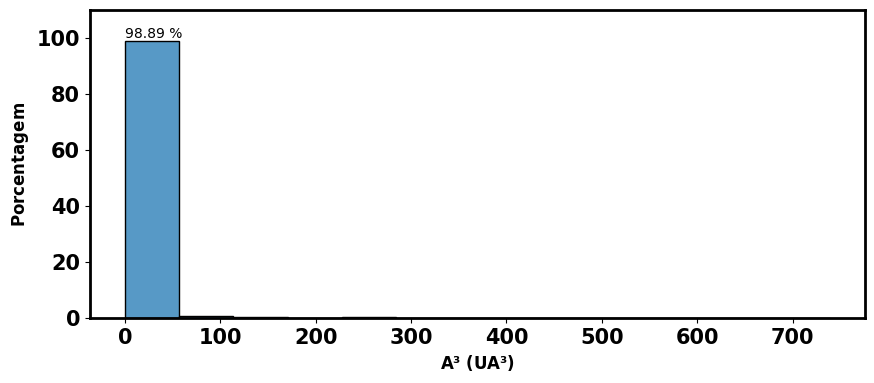

In [93]:
porcentagem = df_limpo[df_limpo['A^3'] <= 55].shape[0]/df_limpo.shape[0]

fig, ax = plt.subplots(figsize = (10, 4))

ax.set_xlabel(r'$\mathbf{A³\ (UA³)}$', fontsize = 12)
ax.set_ylabel(r'$\mathbf{Porcentagem}$', fontsize = 12)

def n_bins(n):
    '''Calcula o número de bins para uma distribuição seguindo a Regra de Sturges'''
    nbins = 1 + (10/3)*np.log10(n)
    nbins = int(nbins.round())                         #Arredondando pra cima o valor de bins
    return nbins

bordas(ax)

nbins = n_bins(df_limpo.shape[0])

ax.annotate(xy = (0, 100), text = f'{round(100*porcentagem, 2)} %')
sns.histplot(x = df_limpo['A^3'], bins = nbins, color = '#1f77b4', stat='percent')

plt.ylim(0, 110)

plt.show()

<font color = purple size = 4>

## Projeto metodo de discobertas

In [94]:
df_disc = df_g[['NAME', 'PLANETDISCMETH']]
hist_disc = df_disc.groupby(['PLANETDISCMETH'])[['NAME']].count().sort_values(by = 'NAME', ascending = True)
hist_disc['PLANETDISCMETH'] = hist_disc.index
hist_disc.reset_index(drop = True)

,NAME,PLANETDISCMETH
0,1,Transit Timing Variations
1,10,Imaging
2,10,Timing
3,16,Microlensing
4,587,RV
5,2636,Transit


<font color = purple size =4>
<p>

## Planetas descobertos com o telescópio Kepler

In [95]:
df_transito = df_g[df_g['PLANETDISCMETH'] == 'Transit']
df_kepler = df_transito.query("NAME.str.contains('Kepler')")

In [96]:
df_kepler.shape

(2243, 14)

In [97]:
df_nkepler = df_transito.query("not NAME.str.contains('Kepler')")
df_nkepler.head()

,NAME,ECC,ECCUPPER,ECCLOWER,A,ALOWER,AUPPER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,PLANETDISCMETH
7,WASP-14 b,0.091,0.003,0.003,0.036769,0.000702,0.000702,1.310,0.050,0.100,2.243752,0.000010,0.000010,Transit
10,WASP-105 b,0.000,0.040,0.000,0.074547,0.002513,0.002513,0.890,0.090,0.090,7.872880,0.000010,0.000010,Transit
15,HAT-P-27 b,0.000,NaN,NaN,0.039949,0.000868,0.000868,0.920,0.060,0.060,3.039577,0.000005,0.000006,Transit
26,HD 3167 b,0.000,NaN,NaN,0.018149,0.000302,0.000302,0.866,0.033,0.033,0.959641,0.000011,0.000012,Transit
34,WASP-21 b,0.000,NaN,NaN,0.052109,0.000868,0.000868,1.010,0.030,0.030,4.322482,0.000019,0.000024,Transit


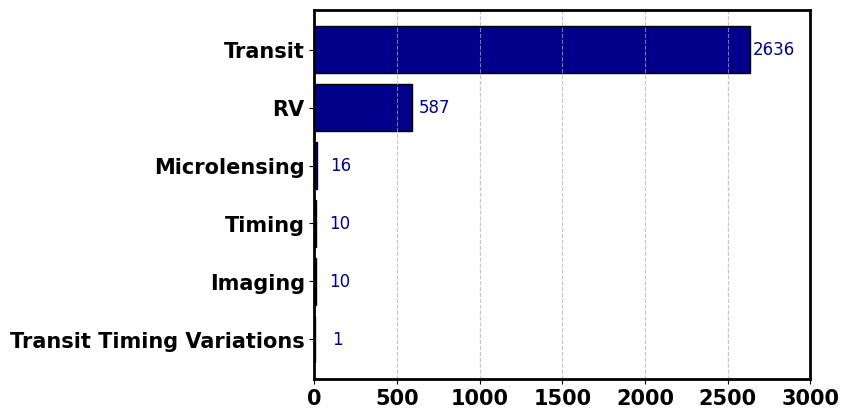

In [117]:
plt.style.use('default')
fig, ax = plt.subplots()

ax.barh(hist_disc['PLANETDISCMETH'], hist_disc['NAME'], color = 'darkblue', edgecolor = 'black')

for i, valor in enumerate(hist_disc['NAME']):
    ax.text(valor + 140, i, valor, color = 'darkblue', fontsize = 12, ha = 'center', va = 'center')

ax.set_xlim(0, 3000)
bordas(ax)

ax.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [99]:
df_limpo['DIV^3'] = np.log(10)*df_limpo['A^3']
df_limpo['DIV^3']
df_limpo['DIV^2'] = np.log(10)*df_limpo['PER^2']
df_limpo['DIV^2']

0        0.001095
1        0.000185
2        0.006325
3        0.001830
4        0.013066
          ...    
3149     0.004956
3150     0.000493
3151     0.000008
3152    28.234132
3153     0.000112
Name: DIV^2, Length: 3154, dtype: float64

<font color = purple size =4>
<p>

## Revisão sistemática

<font color = purple size = 4>

# Extras

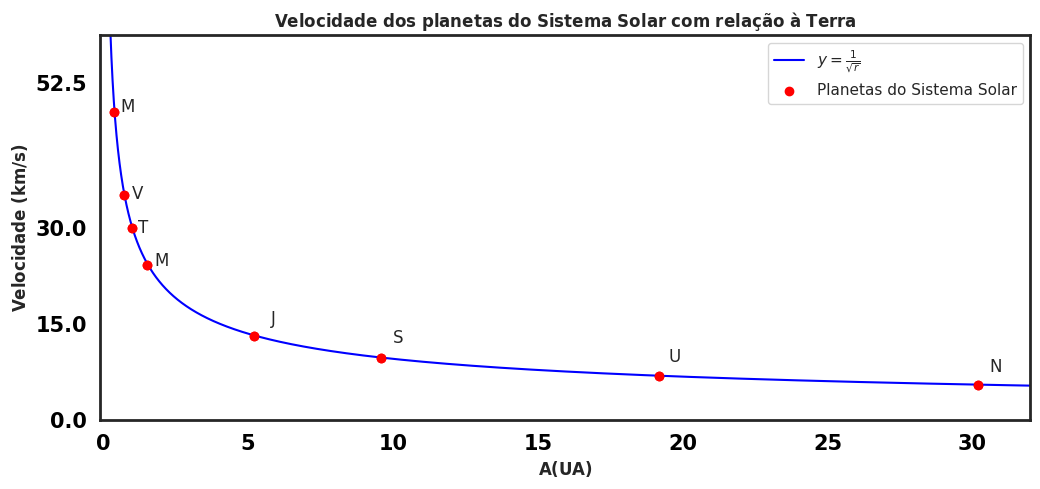

In [101]:
sns.set_theme(style = 'white')
fig, eixo = plt.subplots(figsize = (12, 5))

eixo.scatter(x = planetas['Semieixo maior (UA)'], y = planetas['VELO'], color = 'red', zorder = 1)

eixo.set_xlabel(r'$\mathbf{A (UA)}$')
eixo.set_ylabel(r'$\mathbf{Velocidade\ (km/s)}$')
eixo.set_title(r'$\mathbf{Velocidade\ dos\ planetas\ do\ Sistema\ Solar\ com\ relação\ à\ Terra}$')

eixo.set_ylim(-.1, 2*30)
eixo.set_xlim(-.1, 32)
eixo.set_yticks([0*30, 0.5*30, 1*30, 1.75*30])

eixo.tick_params(axis='both', colors='black', width= 1)

bordas(eixo)

eixo.annotate(xy = (0.6, 1.6*30), text = 'M')
eixo.annotate(xy = (1, 1.15*30), text = 'V')
eixo.annotate(xy = (1.2, .97*30), text = 'T')
eixo.annotate(xy = (1.75, 0.8*30), text = 'M')
eixo.annotate(xy = (5.8, .5*30), text = 'J')
eixo.annotate(xy = (10, .4*30), text = 'S')
eixo.annotate(xy = (19.5, .3*30), text = 'U')
eixo.annotate(xy = (30.6, .25*30), text = 'N')

x = []
z = []
for i in np.arange(0.2, 32, 0.0001):
    x.append(i)
    z.append(30/i**.5)

eixo.plot(x, z, label = r'$y = \frac{1}{\sqrt{r}}$', c = 'blue', zorder = 1)
eixo.scatter(x = planetas['Semieixo maior (UA)'], y = planetas['VELO'], color = 'red', zorder = 1, label = 'Planetas do Sistema Solar')

plt.legend()
plt.show()

In [102]:
classe_a.shape

(390, 10)

In [104]:
df_m_solares = pd.concat([classe_a, classe_b, classe_c])

In [111]:
df_m_solares['A^3'] = df_m_solares['A']**3
df_m_solares['deltaAUPPER^3'] = 3*df_m_solares['A']**2*df_m_solares['AUPPER']
df_m_solares['deltaALOWER^3'] = 3*df_m_solares['A']**2*df_m_solares['ALOWER']

df_m_solares['PER^2'] = df_m_solares['A^3']
df_m_solares['deltaPERUPPER^2'] = df_m_solares['deltaAUPPER^3']
df_m_solares['deltaPERLOWER^2'] = df_m_solares['deltaaLOWER^3']
df_m_solares.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,VELOUPPER,VELOLOWER,A^3,deltaAUPPER^3,deltaALOWER^3,PER^2,deltaPERUPPER^2,deltaPERLOWER^2
0,TRAPPIST-1 h,0.061709,0.001387,0.001387,0.089,0.006,0.006,35.884070,5.743979,5.743979,0.000235,1.584184e-05,1.584184e-05,0.000235,1.584184e-05,1.584184e-05
1,TRAPPIST-1 b,0.011505,0.000259,0.000259,0.089,0.006,0.006,83.105621,30.808472,30.808472,0.000002,1.026671e-07,1.026671e-07,0.000002,1.026671e-07,1.026671e-07
2,TRAPPIST-1 d,0.022201,0.000499,0.000499,0.089,0.006,0.006,59.826047,15.965774,15.965774,0.000011,7.376875e-07,7.376875e-07,0.000011,7.376875e-07,7.376875e-07
3,TRAPPIST-1 g,0.046697,0.001049,0.001049,0.089,0.006,0.006,41.250812,7.590569,7.590569,0.000102,6.864646e-06,6.864646e-06,0.000102,6.864646e-06,6.864646e-06
4,TRAPPIST-1 f,0.038380,0.000862,0.000862,0.089,0.006,0.006,45.501287,9.235423,9.235423,0.000057,3.811298e-06,3.811298e-06,0.000057,3.811298e-06,3.811298e-06


In [109]:
df_m_solares

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,VELOUPPER,VELOLOWER,A^3,deltaAUPPER^3,deltaALOWER^3,PER^2
0,TRAPPIST-1 h,0.061709,0.001387,0.001387,0.089,0.006,0.006,35.884070,5.743979,5.743979,0.000235,1.584184e-05,1.584184e-05,0.000235
1,TRAPPIST-1 b,0.011505,0.000259,0.000259,0.089,0.006,0.006,83.105621,30.808472,30.808472,0.000002,1.026671e-07,1.026671e-07,0.000002
2,TRAPPIST-1 d,0.022201,0.000499,0.000499,0.089,0.006,0.006,59.826047,15.965774,15.965774,0.000011,7.376875e-07,7.376875e-07,0.000011
3,TRAPPIST-1 g,0.046697,0.001049,0.001049,0.089,0.006,0.006,41.250812,7.590569,7.590569,0.000102,6.864646e-06,6.864646e-06,0.000102
4,TRAPPIST-1 f,0.038380,0.000862,0.000862,0.089,0.006,0.006,45.501287,9.235423,9.235423,0.000057,3.811298e-06,3.811298e-06,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,HD 164595 b,0.228139,0.003910,0.003910,0.990,0.030,0.030,62.244133,12.096685,12.096685,0.011874,6.105598e-04,6.105598e-04,0.011874
1166,Kepler-1016 b,0.030492,0.000770,0.000770,0.990,0.070,0.080,170.258497,141.140289,132.914541,0.000028,2.147646e-06,2.147646e-06,0.000028
1167,HIP 14810 b,0.069227,0.001154,0.001154,0.990,0.040,0.040,112.995233,44.666598,44.666598,0.000332,1.658810e-05,1.658810e-05,0.000332
1168,Kepler-1297 b,0.027586,0.000557,0.000557,0.990,0.060,0.060,179.001300,135.518676,135.518676,0.000021,1.272235e-06,1.272235e-06,0.000021


R² = 1.0, [1.00000000e+00 8.55874152e-16]


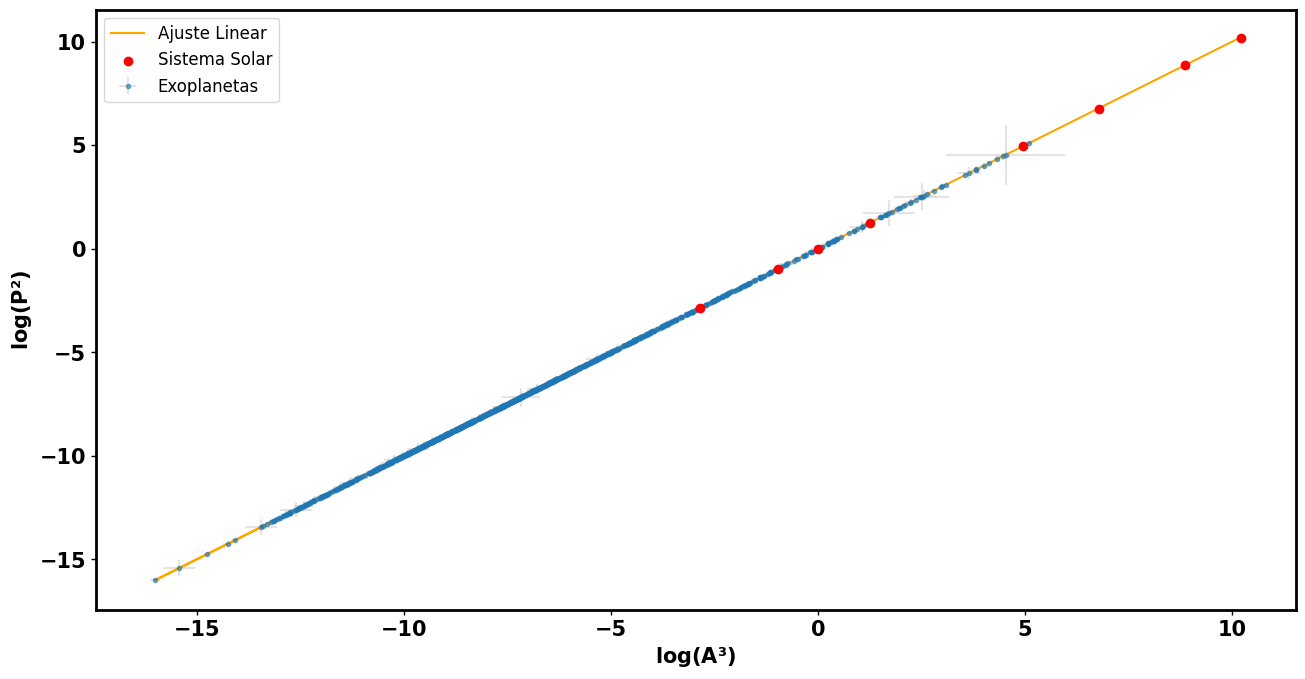

In [112]:
'''definindo o estilo da imagem e criando a figura'''
plt.style.use('default')  
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])   # Adicionando os eixoss

'''Realizando o ajusto dos pontos'''
inclinacao, intercept = np.polyfit(np.log(pd.concat([df_m_solares['A^3'],planetas['A^3']])), 
                                   np.log(pd.concat([df_m_solares['PER^2'], planetas['PER^2']])), 1)

'''Plotando o gráfico com as margens de erro e a reta ajustada'''
ax.errorbar(x = np.log(df_m_solares['A^3']), y = np.log(df_m_solares['PER^2']), 
            xerr = [df_m_solares['deltaALOWER^3']/df_m_solares['A^3'], df_m_solares['deltaAUPPER^3']/df_m_solares['A^3']],
            yerr = [df_m_solares['deltaPERLOWER^2']/df_m_solares['PER^2'], df_m_solares['deltaPERUPPER^2']/df_m_solares['PER^2']],
            fmt = '.', color='#1f77b4', ecolor='#d3d3d3', alpha = 0.6, label = 'Exoplanetas', zorder = 0)

ax.plot(np.log(pd.concat([df_m_solares['A^3'],planetas['A^3']])), inclinacao * np.log(pd.concat([df_m_solares['A^3'],planetas['A^3']])) + intercept, color = 'orange', 
         label = 'Ajuste Linear', zorder = 0)  # plot da reta

ax.scatter(np.log(planetas['A^3']), np.log(planetas['PER^2']), color = 'red', marker = 'o', label = 'Sistema Solar')

'''Editando o gráfico principal'''
ax.set_xlabel(r'$\mathbf{log(A³)}$', fontsize = 15)    
ax.set_ylabel(r'$\mathbf{log(P²)}$', fontsize = 15)
ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

'''Calculando R²'''
y = np.log(df_m_solares['PER^2'])
coef = np.polyfit(np.log(df_m_solares['A^3']), np.log(df_m_solares['PER^2']), 1)
p = np.poly1d(coef)

y_pred = p(np.log(df_m_solares['A^3']))

ss_res = np.sum((y - y_pred) ** 2)    # Soma dos quadrados dos resíduos
ss_tot = np.sum((y - np.mean(y)) ** 2) # Soma dos quadrados totais
r_squared = 1 - (ss_res / ss_tot)

print(f'R² = {round(r_squared, 4)}, {coef}')

'''Realizando o Plot'''
ax.legend(loc = 'upper left', fontsize = 12)
fig.show()